In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
full_df=pd.read_csv("C:/Users/Maniv/Downloads/train_data.csv/train_data.csv")
train_df = full_df.sample(n=int(0.2*full_df.shape[0]))
labels_train = pd.read_csv("C:/Users/Maniv/Downloads/train_labels.csv/train_labels.csv")
lables_df = labels_train.sample(n=int(0.2*labels_train.shape[0]))
dataframe = pd.merge(train_df, lables_df, on=["customer_ID"])
dataframe.to_csv('merge_df.csv')

In [3]:
dataframe.shape

(221192, 191)

In [4]:
dataframe.isna().sum()

customer_ID         0
S_2                 0
P_2              1853
D_39                0
B_1                 0
                ...  
D_142          183420
D_143            4138
D_144            1685
D_145            4138
target              0
Length: 191, dtype: int64

In [5]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_2,219339.0,0.655675,0.244397,-3.558910e-01,0.479581,0.693652,0.863922,1.009995
D_39,221192.0,0.151566,0.268736,2.364925e-07,0.004503,0.008999,0.215805,5.354511
B_1,221192.0,0.123251,0.211904,-7.288446e-01,0.008836,0.030911,0.123887,1.324059
B_2,221102.0,0.624105,0.400891,2.317209e-06,0.108216,0.814392,1.002447,1.010000
R_1,221192.0,0.079513,0.227291,3.240394e-09,0.002896,0.005778,0.008663,2.755107
...,...,...,...,...,...,...,...,...
D_142,37772.0,0.386443,0.234022,-1.121191e-02,0.195180,0.376727,0.555933,2.080474
D_143,217054.0,0.178931,0.379057,1.704016e-08,0.003035,0.006059,0.009084,1.010000
D_144,219507.0,0.052677,0.182885,6.295047e-08,0.002746,0.005498,0.008256,1.343327
D_145,217054.0,0.062053,0.190074,4.681378e-08,0.003032,0.006059,0.009080,3.100821


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221192 entries, 0 to 221191
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 322.3+ MB


In [7]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(dataframe.dtypes)

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
B_2            float64
R_1            float64
S_3            float64
D_41           float64
B_3            float64
D_42           float64
D_43           float64
D_44           float64
B_4            float64
D_45           float64
B_5            float64
R_2            float64
D_46           float64
D_47           float64
D_48           float64
D_49           float64
B_6            float64
B_7            float64
B_8            float64
D_50           float64
D_51           float64
B_9            float64
R_3            float64
D_52           float64
P_3            float64
B_10           float64
D_53           float64
S_5            float64
B_11           float64
S_6            float64
D_54           float64
R_4            float64
S_7            float64
B_12           float64
S_8            float64
D_55           float64
D_56           float64
B_13           float64
R_5        

In [8]:
dataframe.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2017-11-27,0.778677,0.007985,0.002758,0.812289,0.007601,0.149028,0.006596,0.007677,...,NaN,NaN,0.008289,0.002660,0.007600,NaN,0.003236,0.003141,0.007252,0
1,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2017-09-11,0.773598,0.596898,0.018877,1.008631,0.004015,0.129581,0.008916,0.015346,...,NaN,NaN,0.006042,0.005665,0.002763,NaN,0.006280,0.008337,0.008779,0
2,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2018-02-20,0.774514,0.001903,0.007258,0.810020,0.006983,0.151635,0.004898,0.022903,...,NaN,NaN,0.005083,0.004813,0.009725,NaN,0.003377,0.004642,0.009664,0
3,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2017-06-23,0.857705,0.068656,0.021918,0.819510,0.006342,0.130973,0.007116,0.031768,...,NaN,NaN,0.006654,0.002767,0.006218,NaN,0.004293,0.004194,0.000988,0
4,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2017-04-01,0.830310,0.002042,0.026884,0.094391,0.002556,0.178553,0.004626,0.103668,...,NaN,NaN,0.004969,0.000495,0.004178,NaN,0.000763,0.002089,0.003552,0


In [9]:
encoding_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Performing one-hot encoding
dataframe2 = pd.get_dummies(dataframe, columns=encoding_columns)

In [10]:
dataframe2.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2017-11-27,0.778677,0.007985,0.002758,0.812289,0.007601,0.149028,0.006596,0.007677,...,False,False,False,False,False,False,False,False,False,True
1,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2017-09-11,0.773598,0.596898,0.018877,1.008631,0.004015,0.129581,0.008916,0.015346,...,False,False,False,False,False,False,False,False,False,True
2,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2018-02-20,0.774514,0.001903,0.007258,0.810020,0.006983,0.151635,0.004898,0.022903,...,False,False,False,False,False,False,False,False,False,True
3,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2017-06-23,0.857705,0.068656,0.021918,0.819510,0.006342,0.130973,0.007116,0.031768,...,False,False,False,False,False,False,False,False,False,True
4,05d4085723f4fa3cba65a078f291bf9788bf465f9d0e90...,2017-04-01,0.830310,0.002042,0.026884,0.094391,0.002556,0.178553,0.004626,0.103668,...,False,False,False,False,False,False,False,False,False,True


In [11]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(dataframe2.dtypes)

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
B_2            float64
R_1            float64
S_3            float64
D_41           float64
B_3            float64
D_42           float64
D_43           float64
D_44           float64
B_4            float64
D_45           float64
B_5            float64
R_2            float64
D_46           float64
D_47           float64
D_48           float64
D_49           float64
B_6            float64
B_7            float64
B_8            float64
D_50           float64
D_51           float64
B_9            float64
R_3            float64
D_52           float64
P_3            float64
B_10           float64
D_53           float64
S_5            float64
B_11           float64
S_6            float64
D_54           float64
R_4            float64
S_7            float64
B_12           float64
S_8            float64
D_55           float64
D_56           float64
B_13           float64
R_5        

In [12]:
columns_numeric_tolist = dataframe2.select_dtypes(include=np.float64).columns.tolist()
agg_data = dataframe2.groupby('customer_ID')[columns_numeric_tolist].mean()
agg_data

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.473222,0.001420,0.051764,0.486052,0.004990,0.332381,0.007323,0.099720,0.142328,0.062341,...,NaN,NaN,NaN,0.006815,0.005861,0.006449,NaN,0.006634,0.003436,0.003150
0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e,0.434172,0.006425,0.113957,0.912198,0.756715,0.173864,0.006719,0.006030,0.052486,NaN,...,NaN,NaN,NaN,1.006588,0.004424,0.875196,0.048402,1.007759,0.005275,0.096527
000198b3dc70edd65dbf0d7eddbcb926c6d7dbd7986af19d91ef3992ae3ab896,0.354762,0.145202,0.044321,0.574941,0.005928,0.377571,0.005397,0.052376,NaN,0.217732,...,NaN,NaN,NaN,1.002745,0.005096,0.887425,0.161660,1.006525,0.285461,0.186766
000201146e53cacdde1c7e9d29f4d3c46fd4d9231a3744aa39fb9c6afa79b708,0.894219,0.193278,0.403935,0.291237,0.006052,0.114598,0.003265,0.597669,NaN,0.244845,...,NaN,NaN,NaN,0.003605,0.002385,0.007292,NaN,0.004360,0.006840,0.006942
000391f219520dbca6c3c1c46e0fab569da163f79ee266b2cc95fb31029ce617,0.520010,0.003626,0.135613,0.815971,0.002477,0.860382,0.005525,0.002006,0.035971,0.434820,...,NaN,NaN,NaN,0.006569,0.000195,0.002407,NaN,0.003729,0.006453,0.000420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd1a37da07c54a930788ab53061cd7bd34d38592205e4b2bc631c79bcb5160,0.870467,0.004305,0.006588,0.813886,0.004884,NaN,0.004396,0.005392,NaN,NaN,...,NaN,NaN,NaN,0.004526,0.006529,0.005843,NaN,0.007279,0.003673,0.003445
fffd765f1f5fa550f044acb297092807227f4742fa11bbdbbf67e0b6de7e01e6,0.701008,0.361418,0.023870,1.006945,0.002318,0.109608,0.008970,0.007781,NaN,0.069816,...,NaN,NaN,NaN,0.009346,0.003806,0.008866,NaN,0.001120,0.007648,0.007476
fffe3ec7cdbc1caac845c884b389ed347bfc1da9d09731ade6e6a342e13184d3,0.171615,0.188886,0.149061,0.102923,1.006436,0.932876,0.370187,0.311165,0.103428,0.268183,...,NaN,NaN,NaN,0.005436,0.006661,0.008342,NaN,0.006564,0.004397,0.004965


In [13]:
columns_int_tolist = dataframe2.select_dtypes(include=np.int64).columns.tolist()
agg_int_data = dataframe2.groupby('customer_ID')[columns_int_tolist].mean()
agg_int_data.head()
#agg(['mean','median','std']).plot.bar()

,B_31,target
customer_ID,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,1.0,0.0
0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e,1.0,1.0
000198b3dc70edd65dbf0d7eddbcb926c6d7dbd7986af19d91ef3992ae3ab896,1.0,0.0
000201146e53cacdde1c7e9d29f4d3c46fd4d9231a3744aa39fb9c6afa79b708,1.0,0.0
000391f219520dbca6c3c1c46e0fab569da163f79ee266b2cc95fb31029ce617,1.0,1.0


In [14]:
columns_binary_tolist = dataframe2.select_dtypes(include=np.uint8).columns.tolist()
agg_binary_data = dataframe2.groupby('customer_ID')[columns_binary_tolist].mean()
agg_binary_data

""
customer_ID
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4
0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e
000198b3dc70edd65dbf0d7eddbcb926c6d7dbd7986af19d91ef3992ae3ab896
000201146e53cacdde1c7e9d29f4d3c46fd4d9231a3744aa39fb9c6afa79b708
000391f219520dbca6c3c1c46e0fab569da163f79ee266b2cc95fb31029ce617
...
fffd1a37da07c54a930788ab53061cd7bd34d38592205e4b2bc631c79bcb5160
fffd765f1f5fa550f044acb297092807227f4742fa11bbdbbf67e0b6de7e01e6
fffe3ec7cdbc1caac845c884b389ed347bfc1da9d09731ade6e6a342e13184d3


In [15]:
data_merging = pd.merge(agg_binary_data, agg_int_data, on='customer_ID')

# Join merged_data with average_data on a common column (e.g., customer_ID)
data_avg_merge = pd.merge(data_merging, agg_data, on='customer_ID')
#data = average_data.join(grouped_data)
data_avg_merge.head()

,B_31,target,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,1.0,0.0,0.473222,0.001420,0.051764,0.486052,0.004990,0.332381,0.007323,0.099720,...,NaN,NaN,NaN,0.006815,0.005861,0.006449,NaN,0.006634,0.003436,0.003150
0001337ded4e1c2539d1a78ff44a457bd4a95caa55ba1730b2849b92ea687f9e,1.0,1.0,0.434172,0.006425,0.113957,0.912198,0.756715,0.173864,0.006719,0.006030,...,NaN,NaN,NaN,1.006588,0.004424,0.875196,0.048402,1.007759,0.005275,0.096527
000198b3dc70edd65dbf0d7eddbcb926c6d7dbd7986af19d91ef3992ae3ab896,1.0,0.0,0.354762,0.145202,0.044321,0.574941,0.005928,0.377571,0.005397,0.052376,...,NaN,NaN,NaN,1.002745,0.005096,0.887425,0.161660,1.006525,0.285461,0.186766
000201146e53cacdde1c7e9d29f4d3c46fd4d9231a3744aa39fb9c6afa79b708,1.0,0.0,0.894219,0.193278,0.403935,0.291237,0.006052,0.114598,0.003265,0.597669,...,NaN,NaN,NaN,0.003605,0.002385,0.007292,NaN,0.004360,0.006840,0.006942
000391f219520dbca6c3c1c46e0fab569da163f79ee266b2cc95fb31029ce617,1.0,1.0,0.520010,0.003626,0.135613,0.815971,0.002477,0.860382,0.005525,0.002006,...,NaN,NaN,NaN,0.006569,0.000195,0.002407,NaN,0.003729,0.006453,0.000420


In [16]:
to_check_duplicates =data_avg_merge.duplicated().sum()
to_check_duplicates

0

In [17]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(data_avg_merge.dtypes)

B_31      float64
target    float64
P_2       float64
D_39      float64
B_1       float64
B_2       float64
R_1       float64
S_3       float64
D_41      float64
B_3       float64
D_42      float64
D_43      float64
D_44      float64
B_4       float64
D_45      float64
B_5       float64
R_2       float64
D_46      float64
D_47      float64
D_48      float64
D_49      float64
B_6       float64
B_7       float64
B_8       float64
D_50      float64
D_51      float64
B_9       float64
R_3       float64
D_52      float64
P_3       float64
B_10      float64
D_53      float64
S_5       float64
B_11      float64
S_6       float64
D_54      float64
R_4       float64
S_7       float64
B_12      float64
S_8       float64
D_55      float64
D_56      float64
B_13      float64
R_5       float64
D_58      float64
S_9       float64
B_14      float64
D_59      float64
D_60      float64
D_61      float64
B_15      float64
S_11      float64
D_62      float64
D_65      float64
B_16      float64
B_17      

In [18]:
data_avg_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83328 entries, 000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4 to ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7
Columns: 178 entries, B_31 to D_145
dtypes: float64(178)
memory usage: 113.8+ MB


In [19]:
X_train,X_test1, Y_train, Y_test1 = train_test_split(data_avg_merge.drop('target', axis=1), data_avg_merge['target'], test_size=0.3, random_state=24)
X_test1, X_test2, Y_test1, Y_test2 = train_test_split(X_test1,Y_test1, test_size=0.5, random_state=24)

In [20]:
X_train.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test1.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test2.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)

In [21]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import xgboost as xgb

In [23]:
xgb_instance = xgb.XGBClassifier()

In [24]:
xgb_instance = xgb.XGBClassifier() # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.

model_for_feature_selection = xgb_instance.fit(X_train,Y_train)

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

In [25]:
model_for_feature_selection

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
feature_importance = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

,Feature,Importance
1,P_2,0.237262
3,B_1,0.071621
11,D_44,0.027878
8,B_3,0.016441
5,R_1,0.015716
...,...,...
79,D_78,0.002081
108,B_32,0.002051
87,B_27,0.001883
105,D_88,0.001132


In [27]:
# choose featires with FI higher than 0.5%
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]

X1_train = X_train[final_features]
X1_test1 = X_test1[final_features]
X1_test2 = X_test2[final_features]
final_features

1        P_2
3        B_1
11      D_44
8        B_3
5        R_1
25       B_9
9       D_42
21       B_7
6        S_3
136     R_26
4        B_2
26       R_3
24      D_51
28       P_3
19      D_49
124     S_23
13      D_45
140    D_110
10      D_43
16      D_46
14       B_5
7       D_41
132    D_106
162    D_132
32      B_11
23      D_50
55      B_18
12       B_4
51      D_62
52      D_65
Name: Feature, dtype: object

In [28]:
final_fit_model= xgb.XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
final_fit_model.fit(X_train, Y_train)

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
##feature_importance = model.feature_importances_

model_feature_importance = {'Feature':X_train.columns,'Importance':final_fit_model.feature_importances_}
model_feature_importance = pd.DataFrame(model_feature_importance)
model_feature_importance.sort_values("Importance", inplace=True,ascending=False)
model_feature_importance

,Feature,Importance
18,D_48,0.123042
72,D_75,0.087667
3,B_1,0.057524
1,P_2,0.025713
9,D_42,0.021270
...,...,...
102,D_87,0.002619
111,R_21,0.002615
0,B_31,0.002592
47,D_60,0.002577


In [30]:
#feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
# choose featires with FI higher than 0.5%

final_features_FI = model_feature_importance["Feature"][model_feature_importance.Importance > 0.005]

X2_train = X_train[final_features_FI]
X2_test1 = X_test1[final_features_FI]
X2_test2 = X_test2[final_features_FI]
final_features_FI

18      D_48
72      D_75
3        B_1
1        P_2
9       D_42
17      D_47
22       B_8
5        R_1
27      D_52
112     B_33
6        S_3
36       S_7
11      D_44
7       D_41
126     S_25
26       R_3
78      B_26
40      D_56
142     B_39
24      D_51
143    D_112
28       P_3
23      D_50
86      R_11
76      D_77
Name: Feature, dtype: object

In [31]:
merged_feature_importance = pd.concat([feature_importance, model_feature_importance], ignore_index=True)

# Group by 'Feature' and calculate the maximum importance across both models
max_importance = merged_feature_importance.groupby('Feature')['Importance'].max().reset_index()

# Filter features that have importance greater than 0.5% in either of the two models
filtered_features = max_importance[max_importance['Importance'] > 0.005]['Feature']

X3_train = X_train[filtered_features]
X3_test1 = X_test1[filtered_features]
X3_test2 = X_test2[filtered_features]

In [32]:
#Here we do grid search only on #trees, and look at the AUC as performance metric.

from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning Rate","subsample","colsample_bytree","scale_pos_weight", "AUC Train", "AUC Test1","AUC Test2"])

row = 0
for num_trees in [50, 100, 300]:
  for LR in [0.01, 0.1]:
    for subsample in [0.5,0.8]:
        for colsample_bytree in [0.5,1.0]:
            for scale_pos_weight in [1,5,10]:
               xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate = LR,subsample=subsample,colsample_bytree=colsample_bytree,scale_pos_weight=scale_pos_weight)
               model = xgb_instance.fit(X3_train, Y_train)

               table.loc[row,"Num Trees"] = num_trees
               table.loc[row,"Learning Rate"] = LR
               table.loc[row,"subsample"] = subsample
               table.loc[row,"colsample_bytree"] = colsample_bytree
               table.loc[row,"scale_pos_weight"] = scale_pos_weight
               table.loc[row,"AUC Train"] = roc_auc_score(Y_train, model.predict_proba(X3_train)[:,1])
               table.loc[row,"AUC Test1"] = roc_auc_score(Y_test1, model.predict_proba(X3_test1)[:,1])
               table.loc[row,"AUC Test2"] = roc_auc_score(Y_test2, model.predict_proba(X3_test2)[:,1])



               row = row + 1

table

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

,Num Trees,Learning Rate,subsample,colsample_bytree,scale_pos_weight,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.941028,0.933164,0.933171
1,50,0.01,0.5,0.5,5,0.93848,0.931048,0.931288
2,50,0.01,0.5,0.5,10,0.937353,0.929651,0.930267
3,50,0.01,0.5,1.0,1,0.939741,0.931867,0.931721
4,50,0.01,0.5,1.0,5,0.936429,0.92942,0.929174
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.984337,0.938816,0.938501
68,300,0.1,0.8,0.5,10,0.983368,0.937682,0.937353
69,300,0.1,0.8,1.0,1,0.988668,0.938184,0.938291
70,300,0.1,0.8,1.0,5,0.987254,0.937489,0.936685


In [33]:
# Define the thresholds
train_threshold = 0.85
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in table.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row['AUC Train'] - row['AUC Test1']), abs(row['AUC Train'] - row['AUC Test2']))
    
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row['AUC Train'] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row['AUC Test1'] + row['AUC Test2']) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found that satisfies the given conditions.")

Num Trees                100
Learning Rate            0.1
subsample                0.8
colsample_bytree         0.5
scale_pos_weight           5
AUC Train           0.962372
AUC Test1           0.940036
AUC Test2           0.939999
Name: 43, dtype: object


In [34]:
Finalized_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0, scale_pos_weight=1)

# Fit the model on the training data
Finalized_model = Finalized_xgb.fit(X3_train, Y_train)

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

In [35]:
Finalized_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
# Rank Ordering
perf_train_data = pd.DataFrame({"Actual": Y_train, "Prediction": Finalized_model.predict_proba(X3_train)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
statistics = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics["Bad Rate"] = statistics["sum"] / statistics["count"]
statistics

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00223]",1.0,5833,0.000171
"(0.00223, 0.00366]",2.0,5833,0.000343
"(0.00366, 0.0066]",7.0,5833,0.001200
"(0.0066, 0.0152]",24.0,5833,0.004115
"(0.0152, 0.0409]",57.0,5833,0.009772
"(0.0409, 0.142]",348.0,5832,0.059671
"(0.142, 0.388]",1176.0,5833,0.201612
"(0.388, 0.659]",3038.0,5833,0.520830
"(0.659, 0.844]",4740.0,5833,0.812618


In [37]:
statistics = statistics.reset_index()

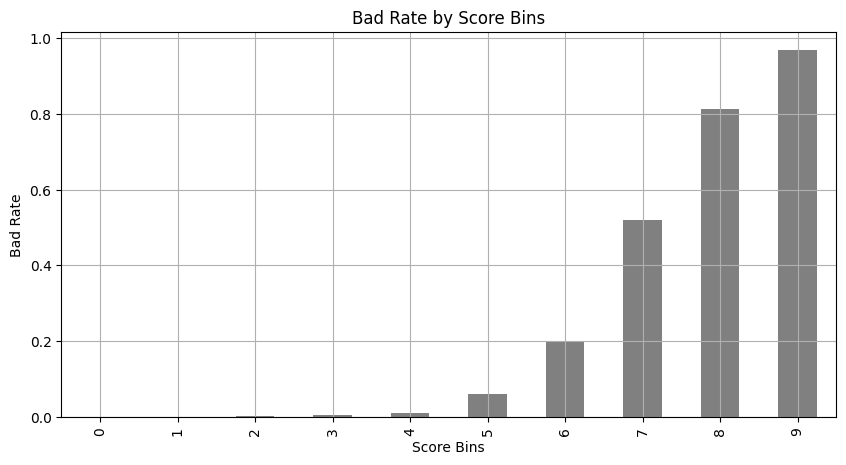

In [38]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
statistics['Bad Rate'].plot(kind='bar', color='grey')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()

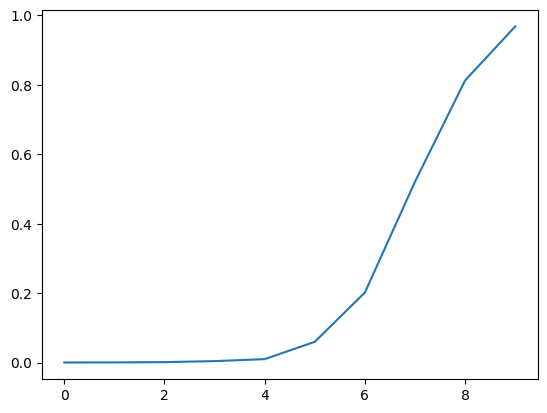

In [39]:
plt.plot(statistics["Bad Rate"])

In [40]:
performance = pd.DataFrame({"Actual": Y_test1, "Prediction": Finalized_model.predict_proba(X3_test1)[:,1]})

performance["Score Bins"] = pd.cut(performance["Prediction"], quantiles)
statistics = performance.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics["Bad Rate"] = statistics["sum"] / statistics["count"]
statistics

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00223]",2.0,1199,0.001668
"(0.00223, 0.00366]",1.0,1258,0.000795
"(0.00366, 0.0066]",5.0,1240,0.004032
"(0.0066, 0.0152]",15.0,1246,0.012039
"(0.0152, 0.0409]",43.0,1214,0.035420
"(0.0409, 0.142]",119.0,1320,0.090152
"(0.142, 0.388]",330.0,1277,0.258418
"(0.388, 0.659]",711.0,1346,0.528232
"(0.659, 0.844]",932.0,1229,0.758340


In [41]:
performance = pd.DataFrame({"Actual": Y_test2, "Prediction": Finalized_model.predict_proba(X3_test2)[:,1]})

performance["Score Bins"] = pd.cut(performance["Prediction"], quantiles)
statistics = performance.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics["Bad Rate"] = statistics["sum"] / statistics["count"]
statistics

C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\Maniv\AppData\Roaming\Python\Python311\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00223]",2.0,1290,0.001550
"(0.00223, 0.00366]",0.0,1344,0.000000
"(0.00366, 0.0066]",8.0,1215,0.006584
"(0.0066, 0.0152]",12.0,1191,0.010076
"(0.0152, 0.0409]",32.0,1183,0.027050
"(0.0409, 0.142]",117.0,1236,0.094660
"(0.142, 0.388]",338.0,1293,0.261408
"(0.388, 0.659]",672.0,1350,0.497778
"(0.659, 0.844]",934.0,1235,0.756275


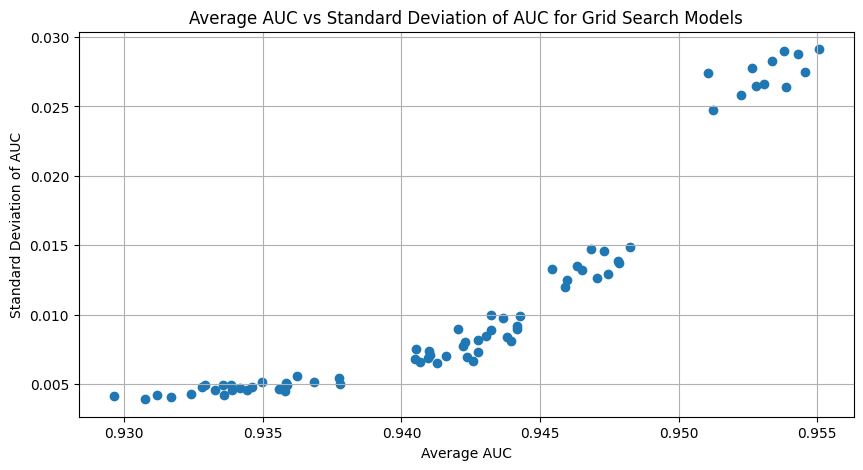

In [42]:
# Calculate average and standard deviation of AUCs
table['Average AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].mean(axis=1)
table['Standard Deviation AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC for Grid Search Models)
plt.figure(figsize=(10, 5))
plt.scatter(table['Average AUC'], table['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

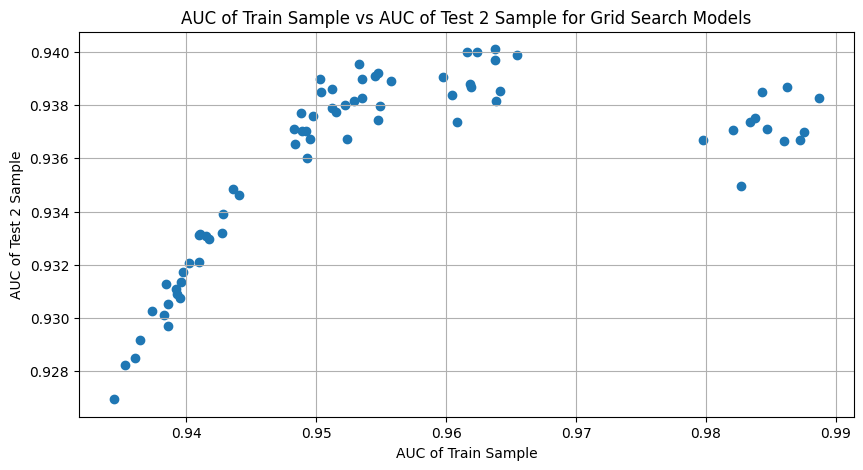

In [43]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(table['AUC Train'], table['AUC Test2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()

In [44]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [46]:
explainer = shap.Explainer(Finalized_model)
calc_shap_values = explainer(X3_test2)

[00:41:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


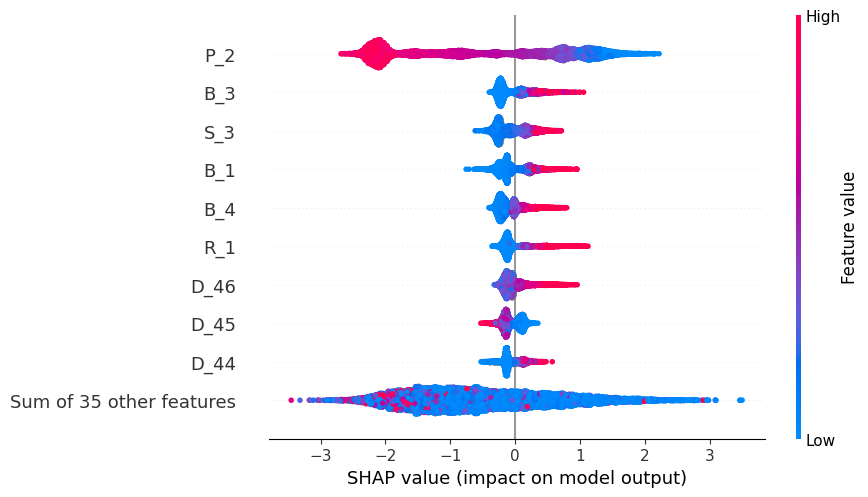

In [47]:
shap.plots.beeswarm(calc_shap_values)

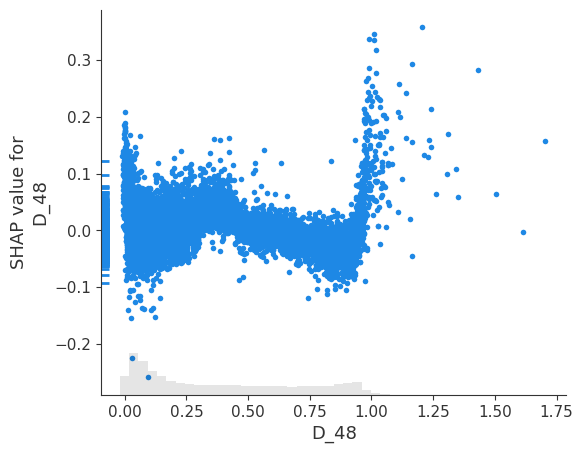

In [48]:
shap.plots.scatter(calc_shap_values[:,"D_48"])

In [49]:
#shap.plots.scatter(calc_shap_values[:,"D_48"], color=calc_shap_values[:,"B_33"])

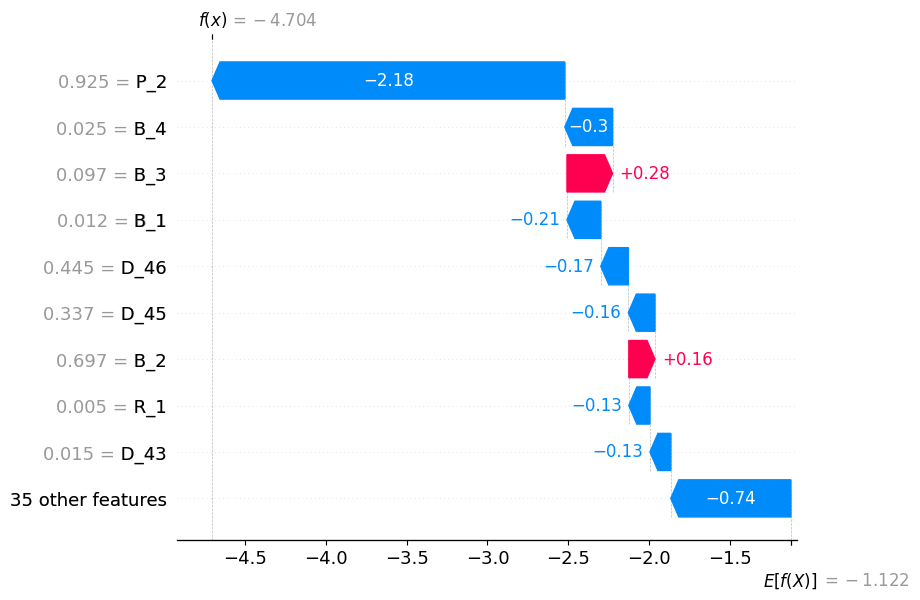

In [50]:
shap.plots.waterfall(calc_shap_values[10])

In [51]:
import shap
explainer = shap.Explainer(Finalized_model)
shap_values = explainer.shap_values(X3_train)

# Compute mean absolute SHAP values for each feature
mean_absolute_values = np.mean(np.abs(shap_values), axis=0)

# Get feature names
to_get_feature = X3_train.columns

# Create a DataFrame of feature importances
df_FI = pd.DataFrame({
    'feature': to_get_feature,
    'importance': mean_absolute_values
})

# Sort DataFrame by importance
df_FI = df_FI.sort_values('importance', ascending=False)

# Get top 5 features
head_features = df_FI['feature'].head(5).values

# Calculate summary statistics for top 5 features
final_stat = X3_train[head_features].describe()

# Print the summary statistics
final_stat .transpose()

[00:41:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


,count,mean,std,min,25%,50%,75%,max
P_2,57915.0,0.650376,0.240095,-2.860182e-01,0.471604,0.685037,0.858344,1.009984
B_3,58310.0,0.129347,0.222861,7.974308e-07,0.005576,0.010427,0.159371,1.342115
S_3,49595.0,0.230644,0.184883,-2.981174e-01,0.132235,0.168773,0.271250,3.237809
B_1,58329.0,0.125003,0.206032,-7.288446e-01,0.010705,0.035504,0.132274,1.323991
B_4,58329.0,0.171064,0.215744,2.149949e-06,0.030524,0.084740,0.234965,3.082322


In [52]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

# Subsetting X3_test1 with the columns of X3_train
X3_test1 = X3_test1[X3_train.columns] 
print(X3_test1.columns)
# Predict default probabilities on the test set
predicted_default = Finalized_model.predict_proba(X3_test1)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_test1['predicted_default'] = predicted_default
X3_test1 = X3_test1.assign(target = Y_test1.values)

# Define the function that calculates default rate and expected revenue
def defrate_expecrev(dataframe2, threshold):
    customers_data = dataframe2[dataframe2["predicted_default"] < threshold].copy()

    # Calculate portfolio default rate
    default_rate = customers_data['target'].mean()

    # Calculate portfolio expected revenue
    customers_data["Monthly_Revenue"] = customers_data["B_2"]*0.02 + customers_data["D_42"]*0.001
    expected_revenue = (customers_data[customers_data["target"] == 0]["Monthly_Revenue"] * 12).sum()

    return default_rate, expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    default_rate, expected_revenue = defrate_expecrev(X3_test1, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")



Index(['B_1', 'B_11', 'B_18', 'B_2', 'B_26', 'B_3', 'B_33', 'B_39', 'B_4',
       'B_5', 'B_7', 'B_8', 'B_9', 'D_106', 'D_110', 'D_112', 'D_132', 'D_41',
       'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49', 'D_50',
       'D_51', 'D_52', 'D_56', 'D_62', 'D_65', 'D_75', 'D_77', 'P_2', 'P_3',
       'R_1', 'R_11', 'R_26', 'R_3', 'S_23', 'S_25', 'S_3', 'S_7'],
      dtype='object')
Threshold: 0.1, Default Rate: 0.019696117051209903, Expected Revenue: 112.98030472097965
Threshold: 0.2, Default Rate: 0.03375796178343949, Expected Revenue: 131.8741811787662
Threshold: 0.3, Default Rate: 0.04699270596675834, Expected Revenue: 147.12607936287782
Threshold: 0.4, Default Rate: 0.061118040594171676, Expected Revenue: 160.7622634144344
Threshold: 0.5, Default Rate: 0.08003015941404568, Expected Revenue: 173.66259092409862


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [53]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target']) 

# Subsetting X3_test1 with the columns of X3_train
X3_test2 = X3_test2[X3_train.columns]

# Predict default probabilities on the test set
predicted_default = Finalized_model.predict_proba(X3_test2)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_test2['predicted_default'] = predicted_default
X3_test2 = X3_test2.assign(target = Y_test2.values)
# Define the function that calculates default rate and expected revenue
def defrate_expecrev(dataframe2, threshold):
    customers_data = dataframe2[dataframe2["predicted_default"] < threshold].copy()

    # Calculate portfolio default rate
    default_rate = customers_data['target'].mean()

    # Calculate portfolio expected revenue
    customers_data["Monthly_Revenue"] = customers_data["B_2"]*0.02 + customers_data["S_3"]*0.001
    expected_revenue = (customers_data[customers_data["target"] == 0]["Monthly_Revenue"] * 12).sum()

    return default_rate, expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    default_rate, expected_revenue = defrate_expecrev(X3_test2, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1, Default Rate: 0.018344769640106427, Expected Revenue: 1125.4496565688858
Threshold: 0.2, Default Rate: 0.030798722044728433, Expected Revenue: 1195.5320017795068
Threshold: 0.3, Default Rate: 0.04486182557722215, Expected Revenue: 1235.417430859482
Threshold: 0.4, Default Rate: 0.059772727272727276, Expected Revenue: 1261.0981281251266
Threshold: 0.5, Default Rate: 0.07676483326115201, Expected Revenue: 1281.2775273736643


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [54]:
# Add the target variable back to df2
#X3_test2 = X3_test2[X3_train.columns]
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
prob_test = Finalized_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = prob_test

# Divide df2 based on date
divide_may17_jan18 = dataframe2[(dataframe2['S_2'] >= '2017-05-01') & (dataframe2['S_2'] <= '2018-01-31')]
divide_mar17_apr17 = dataframe2[(dataframe2['S_2'] >= '2017-03-01') & (dataframe2['S_2'] <= '2017-04-30')]
divide_feb18_mar18 = dataframe2[(dataframe2['S_2'] >= '2018-02-01') & (dataframe2['S_2'] <= '2018-03-31')]

divide_may17_jan18["predicted_default"] = Finalized_model.predict_proba(divide_may17_jan18[filtered_features])[:, 1]
divide_mar17_apr17["predicted_default"] = Finalized_model.predict_proba(divide_mar17_apr17[filtered_features])[:, 1]
divide_feb18_mar18["predicted_default"] = Finalized_model.predict_proba(divide_feb18_mar18[filtered_features])[:, 1]

# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = defrate_expecrev(divide_may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = defrate_expecrev(divide_mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = defrate_expecrev(divide_feb18_mar18, threshold)
    print(f"February 2018 - March 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be

Threshold: 0.1
May 2017 - Jan 2018, Default Rate: 0.018845382205090057, Expected Revenue: 13517.086989661038
March 2017 - April 2017, Default Rate: 0.02537086544005871, Expected Revenue: 2913.9997918263157
February 2018 - March 2018, Default Rate: 0.012204724409448819, Expected Revenue: 3087.669339115066
Threshold: 0.2
May 2017 - Jan 2018, Default Rate: 0.03229202870402551, Expected Revenue: 14341.692007266038
March 2017 - April 2017, Default Rate: 0.04204346385114341, Expected Revenue: 3087.9162137836565
February 2018 - March 2018, Default Rate: 0.02083613388896357, Expected Revenue: 3277.170703800365
Threshold: 0.3
May 2017 - Jan 2018, Default Rate: 0.04736857233192492, Expected Revenue: 14765.36035365374
March 2017 - April 2017, Default Rate: 0.05864868461913846, Expected Revenue: 3177.241166445733
February 2018 - March 2018, Default Rate: 0.030778311830677123, Expected Revenue: 3375.019180027212
Threshold: 0.4
May 2017 - Jan 2018, Default Rate: 0.06443551904623437, Expected Revenue

In [55]:
# Add the target variable back to df2
#X3_test2 = X3_test2[X3_train.columns]
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
prob_test = Finalized_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = prob_test

def calculate_metrics(df, threshold):    
    accepted_customers = df[df["predicted_default"] < threshold].copy()        # Calculate portfolio default rate    
    portfolio_default_rate = accepted_customers['target'].mean()
    # Calculate portfolio expected revenue    
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001    
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()        
    return portfolio_default_rate, portfolio_expected_revenue

dataframe2["predicted_default"] = Finalized_model.predict_proba(dataframe2[filtered_features])[:, 1]

# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(dataframe2, threshold)
    print(f"Mar 2017 - Mar 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Mar 2017 - Mar 2018, Default Rate: 0.018763805524551393, Expected Revenue: 19518.75612060242
Threshold: 0.2
Mar 2017 - Mar 2018, Default Rate: 0.031940197077811754, Expected Revenue: 20706.778924850063
Threshold: 0.3
Mar 2017 - Mar 2018, Default Rate: 0.04644431462106326, Expected Revenue: 21317.62070012669
Threshold: 0.4
Mar 2017 - Mar 2018, Default Rate: 0.06302753911663181, Expected Revenue: 21732.877702277674
Threshold: 0.5
Mar 2017 - Mar 2018, Default Rate: 0.08239983217956787, Expected Revenue: 22058.67360631927
Threshold: 0.6
Mar 2017 - Mar 2018, Default Rate: 0.10549059626358967, Expected Revenue: 22319.589914479446
Threshold: 0.7
Mar 2017 - Mar 2018, Default Rate: 0.13432231306770928, Expected Revenue: 22527.293851398637
Threshold: 0.8
Mar 2017 - Mar 2018, Default Rate: 0.17008284312727717, Expected Revenue: 22685.05931039066
Threshold: 0.9
Mar 2017 - Mar 2018, Default Rate: 0.2130814950280032, Expected Revenue: 22785.978841757045


In [56]:
X3_test2 = X3_test2[filtered_features]
prob_test = Finalized_model.predict_proba(X3_test2)[:, 1]
X3_test2['predicted_default'] = prob_test

# Divide df2 based on date
divide_may17_jan18 = dataframe2[(dataframe2['S_2'] >= '2017-05-01') & (dataframe2['S_2'] <= '2018-01-31')]
divide_mar17_apr17 = dataframe2[(dataframe2['S_2'] >= '2017-03-01') & (dataframe2['S_2'] <= '2017-04-30')]
divide_feb18_mar18 = dataframe2[(dataframe2['S_2'] >= '2018-02-01') & (dataframe2['S_2'] <= '2018-03-31')]

# Add predicted default probabilities to each time period
divide_may17_jan18["predicted_default"] = Finalized_model.predict_proba(divide_may17_jan18[filtered_features])[:, 1]
divide_mar17_apr17["predicted_default"] = Finalized_model.predict_proba(divide_mar17_apr17[filtered_features])[:, 1]
divide_feb18_mar18["predicted_default"] = Finalized_model.predict_proba(divide_feb18_mar18[filtered_features])[:, 1]

# Function to calculate the number of defaults based on a threshold
def num_defaults_thres(df, threshold):
    # Classify customers as defaulted if their predicted default probability is above the threshold
    df['is_defaulted'] = df['predicted_default'].apply(lambda x: 1 if x > threshold else 0)
    # Calculate number of defaulted customers
    default_customer = df['is_defaulted'].sum()
    return default_customer

# Now, you can calculate the number of defaulted customers for each period and threshold
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    num_defaults_may17_jan18 = num_defaults_thres(divide_may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {num_defaults_may17_jan18}")

    num_defaults_mar17_apr17 = num_defaults_thres(divide_mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Number of defaulted customers: {num_defaults_mar17_apr17}")

    num_defaults_feb18_mar18 = num_defaults_thres(divide_feb18_mar18, threshold)
    print(f"February 2018 - March 2018, Number of defaulted customers: {num_defaults_feb18_mar18}")

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

A value is trying to be

Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 64469
March 2017 - April 2017, Number of defaulted customers: 12690
February 2018 - March 2018, Number of defaulted customers: 15914
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 55365
March 2017 - April 2017, Number of defaulted customers: 10646
February 2018 - March 2018, Number of defaulted customers: 13917
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 48818



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


March 2017 - April 2017, Number of defaulted customers: 9226
February 2018 - March 2018, Number of defaulted customers: 12516
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 43143
March 2017 - April 2017, Number of defaulted customers: 7952
February 2018 - March 2018, Number of defaulted customers: 11341
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 37456
March 2017 - April 2017, Number of defaulted customers: 6728
February 2018 - March 2018, Number of defaulted customers: 10163
Threshold: 0.6
May 2017 - Jan 2018, Number of defaulted customers: 31417
March 2017 - April 2017, Number of defaulted customers: 5470
February 2018 - March 2018, Number of defaulted customers: 8896
Threshold: 0.7
May 2017 - Jan 2018, Number of defaulted customers: 24553
March 2017 - April 2017, Number of defaulted customers: 4028
February 2018 - March 2018, Number of defaulted customers: 7437
Threshold: 0.8
May 2017 - Jan 2018, Number of defaulted customers: 16645
March 2

In [57]:
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
prob_test = Finalized_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = prob_test

# Add predicted default probabilities to each time period
dataframe2["predicted_default"] = Finalized_model.predict_proba(dataframe2[filtered_features])[:, 1]

# Now, you can calculate the number of defaulted customers for each period and threshold
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    default_cust_mar17_mar18 = num_defaults_thres(dataframe2, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {default_cust_mar17_mar18}")

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 93073
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 79928
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 70560
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 62436
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 54347
Threshold: 0.6
May 2017 - Jan 2018, Number of defaulted customers: 45783
Threshold: 0.7
May 2017 - Jan 2018, Number of defaulted customers: 36018
Threshold: 0.8
May 2017 - Jan 2018, Number of defaulted customers: 24676
Threshold: 0.9
May 2017 - Jan 2018, Number of defaulted customers: 11216
